In [2]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

plt.rc('figure', figsize=(12, 3))

# 1. Generate time series

In [3]:
# Function to generate time serie
def generate_time_serie(start: int, end:int , n : int,is_sinus = False,noise = True,a=2,b=3,mean = 0, std = 1, start_date='1/1/2022',freq = 'H') -> pd.DataFrame:
    steps = np.linspace(start, end, n)
    if is_sinus:
        y = np.sin(steps)
    else:
        y = a*steps + b
    if noise:
        y = y + np.random.normal(mean, std, n)
    df = pd.DataFrame(y , columns = ['records'])
    df.index = pd.date_range(start = start_date, periods=n, freq = freq)
    # df.to_csv('./data/isSinus_{}_withNoise_{}_start_{}_end_{}_mean_{}_std_{}.csv'.format(is_sinus,noise,start,end,mean,std),index = False)
    return df

In [4]:
# number of records
n = 10000

,records
2022-01-01 00:00:00,3.0000
2022-01-01 01:00:00,5.0002
2022-01-01 02:00:00,7.0004
2022-01-01 03:00:00,9.0006
2022-01-01 04:00:00,11.0008


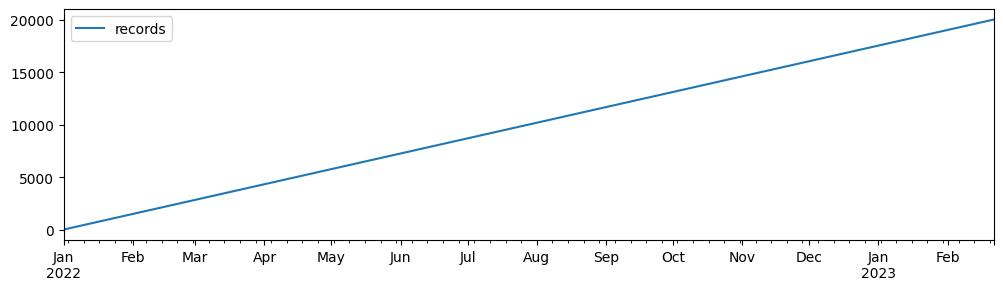

In [5]:
# Generate linear time series with no noise
df = generate_time_serie(0, n, n,is_sinus = False,noise = False)
df.plot(figsize=(12, 3))
df.head()

,records
2022-01-01 00:00:00,-65.392106
2022-01-01 01:00:00,-27.622022
2022-01-01 02:00:00,144.491148
2022-01-01 03:00:00,86.737462
2022-01-01 04:00:00,-21.993223


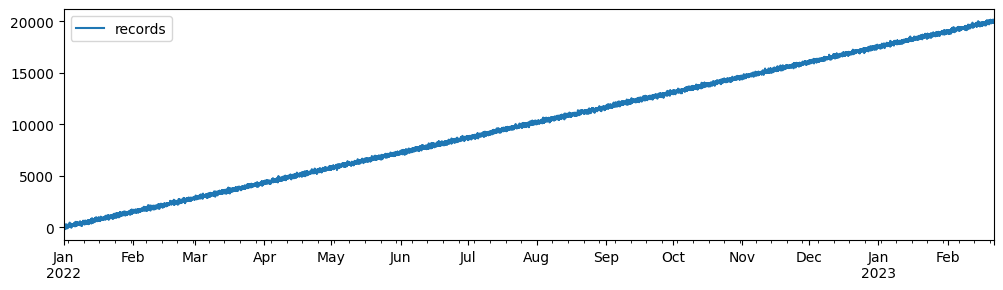

In [7]:
# Generate linear time series with noise
df = generate_time_serie(0, n, n,is_sinus = False,noise = True, std=np.sqrt(n))
df.plot(figsize=(12, 3))
df.head()

,records
2022-01-01 00:00:00,0.000000
2022-01-01 01:00:00,0.083245
2022-01-01 02:00:00,0.165913
2022-01-01 03:00:00,0.247428
2022-01-01 04:00:00,0.327226


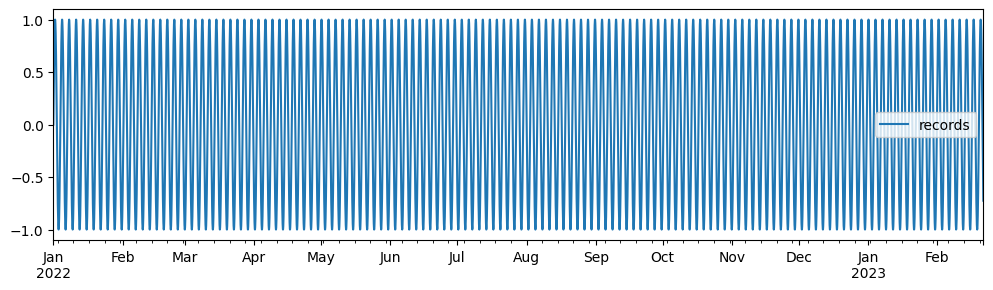

In [8]:
# Generate sinus time series with no noise
df = generate_time_serie(0, n/12, n,is_sinus = True,noise = False)
df.plot(figsize=(12, 3))
df.head()

,records
2022-01-01 00:00:00,1.013555
2022-01-01 01:00:00,1.243526
2022-01-01 02:00:00,2.072957
2022-01-01 03:00:00,-1.235571
2022-01-01 04:00:00,-0.249595


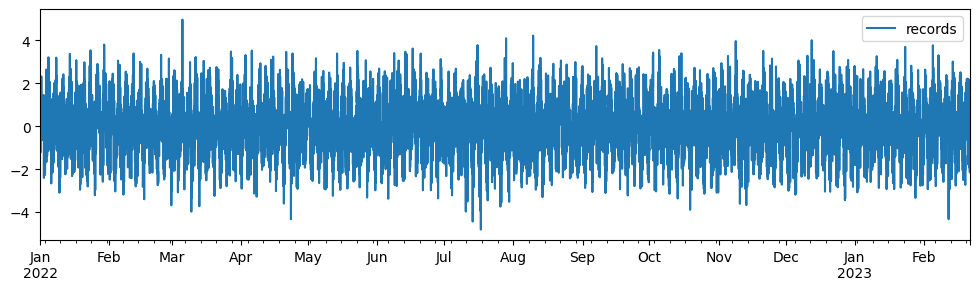

In [9]:
# Generate sinus time series with noise
df = generate_time_serie(0, n/12, n,is_sinus = True,noise = True)
df.plot(figsize=(12, 3))
df.head()

,records
2022-01-01 00:00:00,-0.009275
2022-01-01 01:00:00,0.131044
2022-01-01 02:00:00,0.145035
2022-01-01 03:00:00,0.229169
2022-01-01 04:00:00,0.300783


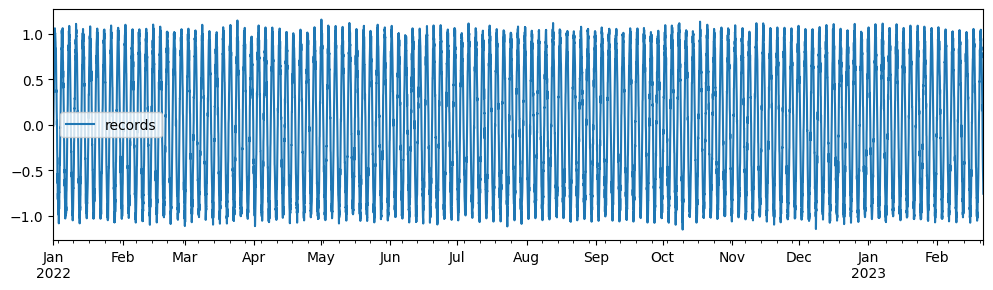

In [10]:
# Generate sinus time series with noise
df = generate_time_serie(0, n/12, n,is_sinus = True,noise = True, std= 0.05)
df.plot(figsize=(12, 3))
df.head()

# 2. Create Missing Values

In [11]:
# Generate missing values
def generate_missing_values(df: pd.DataFrame, missing_rate: float, is_uniform = False, is_normal=False, mean=0, std= 1) -> pd.DataFrame:
    df_missing = df.copy()
    values = np.random.random(df.shape)
    if is_uniform:
        values = np.random.rand(df.shape[0],df.shape[1])
    if is_normal:
        values = np.random.normal(mean, std, size=df.shape)
    nan_mat = values< missing_rate
    df_missing = df.mask(nan_mat)
    return df_missing

,records
2022-01-01 00:00:00,NaN
2022-01-01 01:00:00,6.728702
2022-01-01 02:00:00,NaN
2022-01-01 03:00:00,9.089021
2022-01-01 04:00:00,11.583693


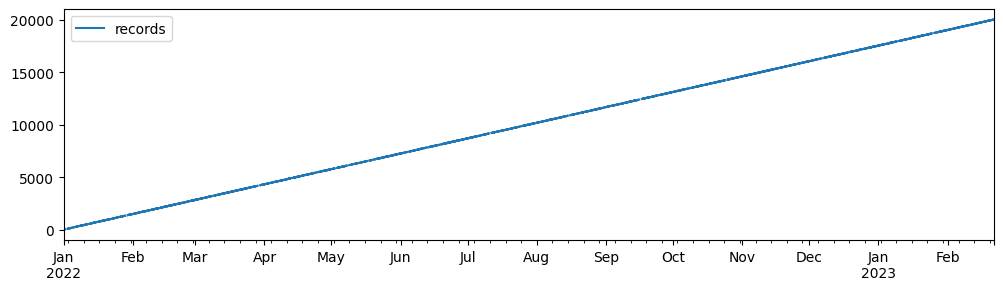

In [12]:
# Add missing values at random
df = generate_time_serie(0, n, n,is_sinus = False,noise = True)
df_missing = generate_missing_values(df, 0.5)
df_missing.plot(figsize=(12, 3))
df_missing.head()

,records
2022-01-01 00:00:00,3.204500
2022-01-01 01:00:00,6.517375
2022-01-01 02:00:00,6.977380
2022-01-01 03:00:00,8.212731
2022-01-01 04:00:00,10.401206


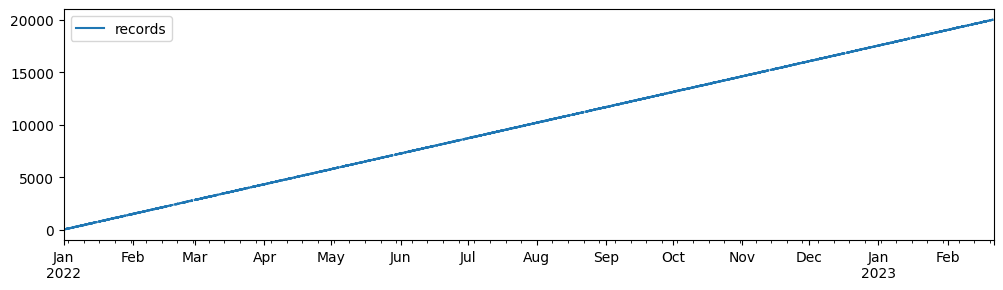

In [13]:
# Add missing values with uniform distribution
df = generate_time_serie(0, n, n,is_sinus = False,noise = True)
df_missing = generate_missing_values(df, 0.5, is_uniform=True)
df_missing.plot(figsize=(12, 3))
df_missing.head()

,records
2022-01-01 00:00:00,NaN
2022-01-01 01:00:00,NaN
2022-01-01 02:00:00,NaN
2022-01-01 03:00:00,8.20532
2022-01-01 04:00:00,NaN


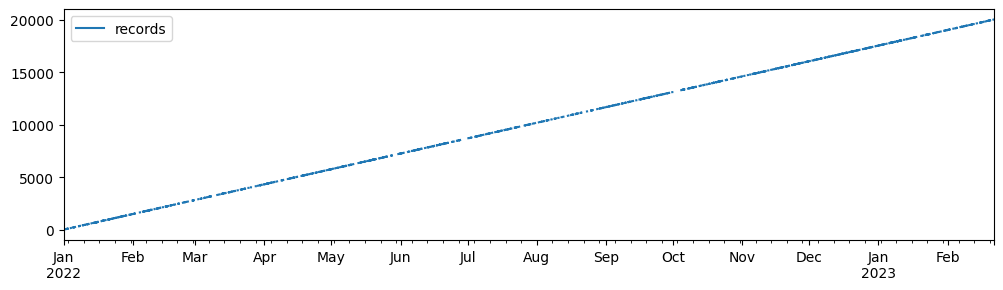

In [14]:
# Add missing values with normal distribution
df = generate_time_serie(0, n, n,is_sinus = False,noise = True)
df_missing = generate_missing_values(df, 0.5, is_normal=True)
df_missing.plot(figsize=(12, 3))
df_missing.head()

# 3. Time Series Imputation

In [15]:
# Evaluate imputation
def evaluate_imputation_mse(df: pd.DataFrame, df_imputed: np.ndarray, method_title: str) -> None:
    mse = mean_squared_error(df[['records']].values, df_imputed, squared=True)
    print(f'MSE for {method_title} imputation: {mse: .5f}')

### 3.1 Classical Methods

In [108]:
def evaluate_classical_imputation(df: pd.DataFrame, df_missing: pd.DataFrame, data_nature:str) -> None:
    print('Evaluate classic imputation for {}'.format(data_nature))
    # mean imputation
    df_missing_1 = df_missing.copy()
    mean_imp = SimpleImputer(missing_values=np.nan,strategy='mean')
    df_mean = mean_imp.fit_transform(df_missing_1)
    evaluate_imputation_mse(df, df_mean, 'mean')
    # median imputation
    df_missing_2 = df_missing.copy()
    median_imp = SimpleImputer(strategy='median')
    df_median = median_imp.fit_transform(df_missing_2)
    evaluate_imputation_mse(df, df_median, 'median')
    # most frequent imputation
    df_missing_3 = df_missing.copy()
    most_frequent_imp = SimpleImputer(strategy='most_frequent')
    df_most_frequent = most_frequent_imp.fit_transform(df_missing_3)
    evaluate_imputation_mse(df, df_most_frequent, 'most frequent')
    # constant imputation
    df_missing_4 = df_missing.copy()
    constant_imp = SimpleImputer(strategy='constant', fill_value=0)
    df_constant = constant_imp.fit_transform(df_missing_4)
    evaluate_imputation_mse(df, df_constant, 'constant')
    # Last Observation Carried Forward
    df_missing_5 = df_missing.copy().fillna(value=0, limit=1)
    df_missing_5 = df_missing_5.fillna(method='ffill')
    evaluate_imputation_mse(df, df_missing_5.values, 'Last Observation Carried Forward')
    # Next Observation Carried Backward
    df_missing_6 = df_missing.copy()
    print("last valie",df_missing_6['records'].iloc[-1])
    df_missing_6 = df_missing_6.fillna(method='bfill')
    evaluate_imputation_mse(df, df_missing_6.values, 'Next Observation Carried Backward')
    # Rolling Statistical
    ## Simple Moving Average
    df_missing_7 = df_missing.copy().fillna(value=0, limit=20)
    df_missing_7 = df_missing_7.fillna(df_missing_7.rolling(3, min_periods=1).mean())
    evaluate_imputation_mse(df, df_missing_7.values, 'Simple Moving Average')
    ## Weighted Moving Average 
    df_missing_8 = df_missing.copy().fillna(value=0, limit=1)
    df_missing_8 = df_missing_8.rolling(window=5).apply(lambda x: x[::-1].cumsum().sum() * 2 / n / (n + 1))
    evaluate_imputation_mse(df, df_missing_8.values, 'Weighted Moving Average')
    ## Exponential Moving Average
    df_missing_8 = df_missing.copy().fillna(value=0, limit=1)
    df_missing_8 = df_missing_8.ewm(halflife=4).mean()
    evaluate_imputation_mse(df, df_missing_8.values, 'Exponential Moving Average')
    # Interpolation
    # Linear
    df_missing_9 = df_missing.copy()
    df_missing_9 = df_missing_9.interpolate(method='linear')
    evaluate_imputation_mse(df, df_missing_9.values, 'Linear interpolation')
    ## Interpolation with time
    df_missing_10 = df_missing.copy()
    df_missing_10 = df_missing_10.interpolate(method='time')
    evaluate_imputation_mse(df, df_missing_10.values, 'Interpolation with time')
    ## Interpolation with spline
    df_missing_11 = df_missing.copy()
    df_missing_11 = df_missing_11.interpolate(method='spline', order=2)
    evaluate_imputation_mse(df, df_missing_11.values, 'Interpolation with spline')


### Sinus

In [109]:
# Generate sinus time series
df = generate_time_serie(0, n/12, n,is_sinus = True,noise = False)
# Generate sinus time series and random missing values
df_missing = generate_missing_values(df, 0.3,is_uniform = False, is_normal=False)
evaluate_classical_imputation(df, df_missing, 'sinus with random missing values')

Evaluate classic imputation for sinus with random missing values
MSE for mean imputation:  0.14736
MSE for median imputation:  0.14735
MSE for most frequent imputation:  0.44121
MSE for constant imputation:  0.14735


In [110]:
# Generate sinus time series and gaussian missing values
df_missing = generate_missing_values(df, 0.3,is_uniform = False, is_normal=True)
evaluate_classical_imputation(df, df_missing, 'sinus with normal missing values')

Evaluate classic imputation for sinus with normal missing values
MSE for mean imputation:  0.30582
MSE for median imputation:  0.30599
MSE for most frequent imputation:  0.92981
MSE for constant imputation:  0.30579


In [111]:
# Generate sinus time series and uniform missing values
df_missing = generate_missing_values(df, 0.3,is_uniform = True, is_normal=False)
evaluate_classical_imputation(df, df_missing, 'sinus with uniform missing values')

Evaluate classic imputation for sinus with uniform missing values
MSE for mean imputation:  0.14937
MSE for median imputation:  0.14939
MSE for most frequent imputation:  0.44758
MSE for constant imputation:  0.14935


#### Sinus with noise

In [112]:
# Generate sinus time series with noise
df = generate_time_serie(0, n/12, n,is_sinus = True,noise = True)

df_missing = generate_missing_values(df, 0.3,is_uniform = False, is_normal=False)
evaluate_classical_imputation(df, df_missing, 'sinus with noise and random missing values')

Evaluate classic imputation for sinus with noise and random missing values
MSE for mean imputation:  0.44386
MSE for median imputation:  0.44400
MSE for most frequent imputation:  5.66824
MSE for constant imputation:  0.44350


In [113]:
df_missing = generate_missing_values(df, 0.3,is_uniform = False, is_normal=True)
evaluate_classical_imputation(df, df_missing, 'sinus with noise and normal missing values')

Evaluate classic imputation for sinus with noise and normal missing values
MSE for mean imputation:  0.95011
MSE for median imputation:  0.95011
MSE for most frequent imputation:  10.19529
MSE for constant imputation:  0.95021


In [114]:
# Generate sinus time series and gaussian missing values
df_missing = generate_missing_values(df, 0.3,is_uniform = True, is_normal=False)
evaluate_classical_imputation(df, df_missing, 'sinus with noise and normal missing values')

Evaluate classic imputation for sinus with noise and normal missing values
MSE for mean imputation:  0.43389
MSE for median imputation:  0.43389
MSE for most frequent imputation:  5.47842
MSE for constant imputation:  0.43401


### Line

In [115]:
# Generate linear time serie with missing values in normal distribution
df = generate_time_serie(0, n, n,is_sinus = False,noise = False)
df_missing = generate_missing_values(df, 0.3)
evaluate_classical_imputation(df, df_missing, 'linear with random missing values')

Evaluate classic imputation for linear with random missing values
MSE for mean imputation:  9978533.71756
MSE for median imputation:  9978237.72456
MSE for most frequent imputation:  39920298.62492
MSE for constant imputation:  39938226.88238


In [116]:
df_missing = generate_missing_values(df, 0.3, is_normal=True)
evaluate_classical_imputation(df, df_missing, 'linear with uniform missing values')

Evaluate classic imputation for linear with uniform missing values
MSE for mean imputation:  20486203.28653
MSE for median imputation:  20486882.71447
MSE for most frequent imputation:  82550033.61042
MSE for constant imputation:  82587119.34854


In [117]:
df_missing = generate_missing_values(df, 0.3, is_uniform=True)
evaluate_classical_imputation(df, df_missing, 'linear with uniform missing values')

Evaluate classic imputation for linear with uniform missing values
MSE for mean imputation:  10048426.20141
MSE for median imputation:  10048171.86429
MSE for most frequent imputation:  40515679.15507
MSE for constant imputation:  40533891.19951


### 3.2 Advanced Methods